In [1]:
#Importing the fashion_mnist dataset
from keras.datasets import fashion_mnist

import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
classes = np.unique(train_Y)
nClasses = len(classes)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

4431872/4422102 [==============================] - 4s 1us/step
('Training data shape : ', (60000, 28, 28), (60000,))
('Testing data shape : ', (10000, 28, 28), (10000,))
('Total number of outputs : ', 10)
('Output classes : ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))


Text(0.5,1,u'Ground Truth : 9')

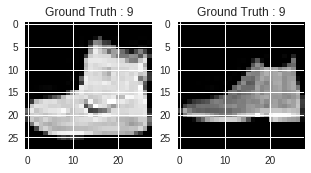

In [3]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Processing the data

In [4]:
#reshaping the train and test sets to matrix of size 28 x 28 x 1 
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

#changing from int8 to FLoat32 and pixel values in range 0 - 1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Changing the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
#split the training data into 80% training and 20% validation
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [6]:
# Importing all the necessary modules required to train the model
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

#Defining parameters
batch_size = 64
epochs = 20
num_classes = 10


fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

#Compile the model
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#View model summary
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [7]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 125s 3ms/step - loss: 0.4688 - acc: 0.8279 - val_loss: 0.3613 - val_acc: 0.8687
Epoch 2/20
48000/48000 [==============================] - 126s 3ms/step - loss: 0.2890 - acc: 0.8937 - val_loss: 0.2741 - val_acc: 0.9002
Epoch 3/20
48000/48000 [==============================] - 126s 3ms/step - loss: 0.2411 - acc: 0.9117 - val_loss: 0.2498 - val_acc: 0.9091
Epoch 4/20
48000/48000 [==============================] - 127s 3ms/step - loss: 0.2088 - acc: 0.9235 - val_loss: 0.2333 - val_acc: 0.9157
Epoch 5/20
48000/48000 [==============================] - 125s 3ms/step - loss: 0.1830 - acc: 0.9313 - val_loss: 0.2428 - val_acc: 0.9135
Epoch 6/20
48000/48000 [==============================] - 124s 3ms/step - loss: 0.1604 - acc: 0.9406 - val_loss: 0.2253 - val_acc: 0.9199
Epoch 7/20
48000/48000 [==============================] - 124s 3ms/step - loss: 0.1404 - acc: 0.9469 - val_loss: 0.2382 - 

In [9]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

('Test loss:', 0.4765945294820063)
('Test accuracy:', 0.9177)
